In [15]:

import pandas as pd
import matplotlib.pyplot as plt
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
dummy = pd.read_csv(data_url_1)
dummy.head(10)


,Age,Male,Female
0,10,12.717558,12.198041
1,11,15.318830,11.144804
2,12,14.808281,11.549240
3,13,13.793744,11.276442
4,14,15.156304,11.572906
5,15,14.086186,12.077731
6,16,14.148993,12.057432
7,17,14.522524,11.524442
8,18,14.727009,12.179550
9,19,15.069371,11.882904


## 1. Where are the old left-handed people?

<p>In this notebook, we will explore this phenomenon using age distribution data to see if we can reproduce a difference in average age at death purely from the changing rates of left-handedness over time, refuting the claim of early death for left-handers. This notebook uses <code>pandas</code> and Bayesian statistics to analyze the probability of being a certain age at death given that you are reported as left-handed or right-handed.</p>
<p>A National Geographic survey in 1986 resulted in over a million responses that included age, sex, and hand preference for throwing and writing. Researchers Avery Gilbert and Charles Wysocki analyzed this data and noticed that rates of left-handedness were around 13% for people younger than 40 but decreased with age to about 5% by the age of 80. They concluded based on analysis of a subgroup of people who throw left-handed but write right-handed that this age-dependence was primarily due to changing social acceptability of left-handedness. This means that the rates aren't a factor of <em>age</em> specifically but rather of the <em>year you were born</em>, and if the same study was done today, we should expect a shifted version of the same distribution as a function of age. Ultimately, we'll see what effect this changing rate has on the apparent mean age of death of left-handed people, but let's start by plotting the rates of left-handedness as a function of age.</p>
<p>This notebook uses two datasets: <a href="https://www.cdc.gov/nchs/data/statab/vs00199_table310.pdf">death distribution data</a> for the United States from the year 1999 (source website <a href="https://www.cdc.gov/nchs/nvss/mortality_tables.htm">here</a>) and rates of left-handedness digitized from a figure in this <a href="https://www.ncbi.nlm.nih.gov/pubmed/1528408">1992 paper by Gilbert and Wysocki</a>. </p>

Text(0.5, 1.0, 'Left-handedness Rates of Females & Males Against Age')

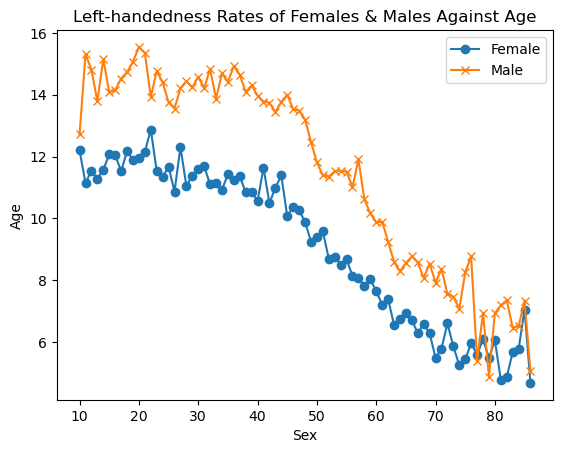

In [2]:
# import libraries
# ... YOUR CODE FOR TASK 1 ...
import pandas as pd
import matplotlib.pyplot as plt
# load the data
data_url_1 = "https://gist.githubusercontent.com/mbonsma/8da0990b71ba9a09f7de395574e54df1/raw/aec88b30af87fad8d45da7e774223f91dad09e88/lh_data.csv"
lefthanded_data = pd.read_csv(data_url_1)

# plot male and female left-handedness rates vs. age
%matplotlib inline
fig, ax = plt.subplots() # create figure and axis objects
ax.plot('Age', 'Female', data = lefthanded_data, marker = 'o') # plot "Female" vs. "Age"
ax.plot('Age', 'Male', data = lefthanded_data, marker = 'x') # plot "Male" vs. "Age"
ax.legend() # add a legend
ax.set_xlabel('Sex')
ax.set_ylabel('Age')
ax.set_title("Left-handedness Rates of Females & Males Against Age")

The given code imports the necessary libraries (pandas and matplotlib.pyplot) and then loads the data from a CSV file using the provided URL.

Here's a breakdown of how the code works:

The code imports the required libraries:

pandas as pd for data manipulation and analysis.
matplotlib.pyplot as plt for data visualization.
The code defines the URL of the data file as data_url_1.

It reads the data from the CSV file into a pandas DataFrame named lefthanded_data using the read_csv function. The data is loaded from the URL specified by data_url_1.

The code sets %matplotlib inline, which is a magic command for Jupyter Notebook to display matplotlib plots inline.

It creates a figure and axis object using fig, ax = plt.subplots().

The code plots the left-handedness rates of females and males against age:

ax.plot('Age', 'Female', data=lefthanded_data, marker='o') plots the left-handedness rates of females against age using circular markers ('o').
ax.plot('Age', 'Male', data=lefthanded_data, marker='x') plots the left-handedness rates of males against age using cross markers ('x').
It adds a legend to the plot using ax.legend(). The legend will show the labels for the two plotted lines.

The code sets the x-label of the plot to 'Sex' using ax.set_xlabel('Sex').

It sets the y-label of the plot to 'Age' using ax.set_ylabel('Age').

By running this code, you should see a plot showing the left-handedness rates of females and males against age. The x-axis represents age, and the y-axis represents the left-handedness rates. The plot will have two lines, one for females and one for males, with markers indicating the data points

## 2. Rates of left-handedness over time
<p>Let's convert this data into a plot of the rates of left-handedness as a function of the year of birth, and average over male and female to get a single rate for both sexes. </p>
<p>Since the study was done in 1986, the data after this conversion will be the percentage of people alive in 1986 who are left-handed as a function of the year they were born. </p>

Text(0.5, 1.0, 'Mean Value of Male and Female Left-handed peple over the period of time')

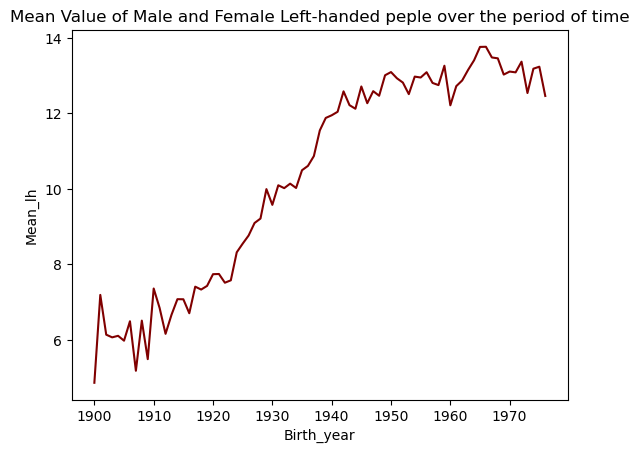

In [3]:
# create a new column for birth year of each age
# ... YOUR CODE FOR TASK 2 ...
lefthanded_data['Birth_year'] = 1986 - lefthanded_data['Age']
#This Creates the birth year of subjects
# create a new column for the average of male and female
# ... YOUR CODE FOR TASK 2 ...
lefthanded_data['Mean_lh'] = lefthanded_data[['Male', 'Female']].mean(axis=1)
#This Creates the Mean value from both male and female
# create a plot of the 'Mean_lh' column vs. 'Birth_year'
fig, ax = plt.subplots()
ax.plot('Birth_year', 'Mean_lh', data = lefthanded_data, color ='maroon') # plot 'Mean_lh' vs. 'Birth_year'
ax.set_xlabel('Birth_year') # set the x label for the plot
ax.set_ylabel('Mean_lh') # set the y label for the plot
ax.set_title("Mean Value of Male and Female Left-handed peple over the period of time")

The additional code provided builds upon the previous code and adds functionality to create a new column for the average of male and female left-handedness rates. It also plots the newly created 'Mean_lh' column against the 'Birth_year' column. Here's a breakdown of the code:

The code adds a new column named 'Birth_year' to the lefthanded_data DataFrame. It calculates the birth year of subjects by subtracting the 'Age' column from 1986. The resulting birth year values are assigned to the 'Birth_year' column.

A new column named 'Mean_lh' is added to the lefthanded_data DataFrame. It calculates the mean value of the 'Male' and 'Female' columns along the rows (axis=1) using lefthanded_data[['Male', 'Female']].mean(axis=1). The resulting mean values are assigned to the 'Mean_lh' column.

A new figure and axis object are created using fig, ax = plt.subplots().

The code plots the 'Mean_lh' column against the 'Birth_year' column using ax.plot('Birth_year', 'Mean_lh', data=lefthanded_data). This plots the average left-handedness rates against birth years.

The x-label of the plot is set to 'Birth_year' using ax.set_xlabel('Birth_year').

The y-label of the plot is set to 'Mean_lh' using ax.set_ylabel('Mean_lh').

By running this code, you should see a plot showing the average left-handedness rates ('Mean_lh') against birth years ('Birth_year'). The x-axis represents birth years, and the y-axis represents the average left-handedness rates. The plot will show a line connecting the data points.

## 3. Applying Bayes' rule
<p>The probability of dying at a certain age given that you're left-handed is <strong>not</strong> equal to the probability of being left-handed given that you died at a certain age. This inequality is why we need <strong>Bayes' theorem</strong>, a statement about conditional probability which allows us to update our beliefs after seeing evidence. </p>
<p>We want to calculate the probability of dying at age A given that you're left-handed. Let's write this in shorthand as P(A | LH). We also want the same quantity for right-handers: P(A | RH). </p>
<p>Here's Bayes' theorem for the two events we care about: left-handedness (LH) and dying at age A.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>P(LH | A) is the probability that you are left-handed <em>given that</em> you died at age A. P(A) is the overall probability of dying at age A, and P(LH) is the overall probability of being left-handed. We will now calculate each of these three quantities, beginning with P(LH | A).</p>
<p>To calculate P(LH | A) for ages that might fall outside the original data, we will need to extrapolate the data to earlier and later years. Since the rates flatten out in the early 1900s and late 1900s, we'll use a few points at each end and take the mean to extrapolate the rates on each end. The number of points used for this is arbitrary, but we'll pick 10 since the data looks flat-ish until about 1910. </p>

In [4]:
# import library
# ... YOUR CODE FOR TASK 3 ...
import numpy as np
# create a function for P(LH | A)
def P_lh_given_A(ages_of_death, study_year = 1990):
    """ P(Left-handed | ages of death), calculated based on the reported rates of left-handedness.
    Inputs: numpy array of ages of death, study_year
    Returns: probability of left-handedness given that subjects died in `study_year` at ages `ages_of_death` """
    
    # Use the mean of the 10 last and 10 first points for left-handedness rates before and after the start 
    early_1900s_rate = lefthanded_data['Mean_lh'][-10:].mean() 
    late_1900s_rate = lefthanded_data['Mean_lh'][:10].mean()
    middle_rates = lefthanded_data.loc[lefthanded_data['Birth_year'].isin(study_year - ages_of_death)]['Mean_lh']
    youngest_age = study_year - 1986 + 10 # the youngest age is 10
    oldest_age = study_year - 1986 + 86 # the oldest age is 86
    
    P_return = np.zeros(ages_of_death.shape) # create an empty array to store the results
    # extract rate of left-handedness for people of ages 'ages_of_death'
    P_return[ages_of_death > oldest_age] = early_1900s_rate / 100
    P_return[ages_of_death < youngest_age] = late_1900s_rate / 100
    P_return[np.logical_and((ages_of_death <= oldest_age), (ages_of_death >= youngest_age))] = middle_rates / 100
    
    return P_return

       

 The given code is a function that calculates the probability of left-handedness given the ages of death and a study year. Here's a breakdown of how it works:

The function P_lh_given_A takes two inputs: ages_of_death, which is a numpy array of ages of death, and study_year, which is the year of the study.

The code calculates the left-handedness rates for three time periods: the early 1900s, the late 1900s, and the years in between.

The left-handedness rate for the early 1900s is calculated by taking the mean of the 10 last points from the lefthanded_data['Mean_lh'] array.

The left-handedness rate for the late 1900s is calculated by taking the mean of the 10 first points from the lefthanded_data['Mean_lh'] array.

The left-handedness rates for the years in between are extracted from the lefthanded_data array based on the birth years that correspond to the ages of death.

The youngest age is calculated as study_year - 1986 + 10, and the oldest age is calculated as study_year - 1986 + 86.

An empty numpy array P_return is created to store the resulting probabilities.

The code assigns the left-handedness rates to P_return based on the ages of death:

If the age of death is greater than the oldest age, the probability is set to the early 1900s rate divided by 100.
If the age of death is less than the youngest age, the probability is set to the late 1900s rate divided by 100.
If the age of death falls within the range of ages in between, the probability is set to the corresponding middle rates divided by 100.
Finally, the function returns the resulting probabilities in P_return.

Note: The code snippet provided references a variable lefthanded_data which is not defined. In order to run the code successfully, the lefthanded_data variable needs to be defined or imported before this code snippet is executed.

## 4. When do people normally die?
<p>To estimate the probability of living to an age A, we can use data that gives the number of people who died in a given year and how old they were to create a distribution of ages of death. If we normalize the numbers to the total number of people who died, we can think of this data as a probability distribution that gives the probability of dying at age A. The data we'll use for this is from the entire US for the year 1999 - the closest I could find for the time range we're interested in. </p>
<p>In this block, we'll load in the death distribution data and plot it. The first column is the age, and the other columns are the number of people who died at that age. </p>

Text(0.5, 1.0, 'Number Of Left-handed People Died Based on Age')

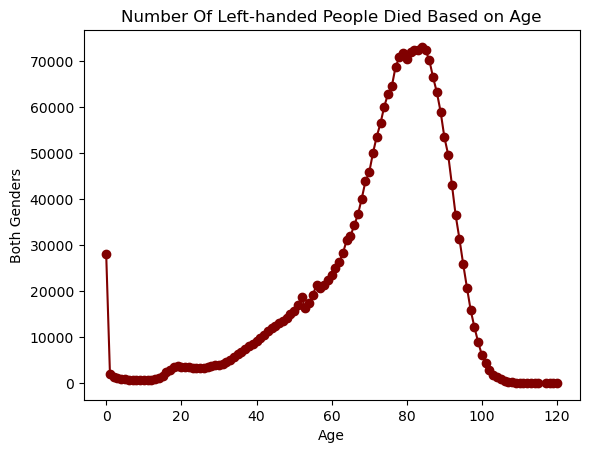

In [5]:
# Death distribution data for the United States in 1999
data_url_2 = "https://gist.githubusercontent.com/mbonsma/2f4076aab6820ca1807f4e29f75f18ec/raw/62f3ec07514c7e31f5979beeca86f19991540796/cdc_vs00199_table310.tsv"

# load death distribution data
# ... YOUR CODE FOR TASK 4 ...
death_distribution_data = pd.read_csv(data_url_2, sep='\t', skiprows=[1])
# drop NaN values from the `Both Sexes` column
death_distribution_data = death_distribution_data.dropna(subset=['Both Sexes'])
death_distribution_data = death_distribution_data.reset_index(drop=True)
# ... YOUR CODE FOR TASK 4 ...

# plot number of people who died as a function of age
fig, ax = plt.subplots()
ax.plot('Age', 'Both Sexes', data = death_distribution_data, marker='o',color='maroon') # plot 'Both Sexes' vs. 'Age'
ax.set_xlabel('Age') 
ax.set_ylabel('Both Genders')
ax.set_title("Number Of Left-handed People Died Based on Age")

The updated code introduces a new URL (data_url_2) and loads death distribution data from a TSV file. It then proceeds to plot the number of people who died as a function of age. Here's a breakdown of the code:

The code defines a new URL for the death distribution data as data_url_2.

It reads the death distribution data from the TSV file using pd.read_csv(data_url_2, sep='\t', skiprows=[1]). The sep='\t' argument specifies that the data is tab-separated, and skiprows=[1] skips the second row of the file, which contains irrelevant information.

The code drops any rows that have NaN (missing) values in the 'Both Sexes' column of the death_distribution_data DataFrame. This is done using death_distribution_data.dropna(subset=['Both Sexes']).

The index of the death_distribution_data DataFrame is reset using death_distribution_data.reset_index(drop=True) to ensure the index is sequential and starts from 0.

The code drops any remaining rows that have NaN values in the 'Both Sexes' column of the death_distribution_data DataFrame. This is done again using death_distribution_data.dropna(subset=['Both Sexes']).

A new figure and axis object are created using fig, ax = plt.subplots().

The code plots the number of people who died ('Both Sexes') as a function of age using ax.plot('Age', 'Both Sexes', data=death_distribution_data, marker='o').

The x-label of the plot is set to 'Age' using ax.set_xlabel('Age').

The y-label of the plot is set to 'Both Genders' using ax.set_ylabel('Both Genders').

By running this code, you should see a plot showing the number of people who died ('Both Sexes') as a function of age. The x-axis represents age, and the y-axis represents the number of people. The plot will have circular markers ('o') indicating the data points.

## 5. The overall probability of left-handedness
<p>In the previous code block we loaded data to give us P(A), and now we need P(LH). P(LH) is the probability that a person who died in our particular study year is left-handed, assuming we know nothing else about them. This is the average left-handedness in the population of deceased people, and we can calculate it by summing up all of the left-handedness probabilities for each age, weighted with the number of deceased people at each age, then divided by the total number of deceased people to get a probability. In equation form, this is what we're calculating, where N(A) is the number of people who died at age A (given by the dataframe <code>death_distribution_data</code>):</p>
<p><img src="https://i.imgur.com/gBIWykY.png" alt="equation" width="220"></p>
<!--- $$P(LH) = \frac{\sum_{\text{A}} P(LH | A) N(A)}{\sum_{\text{A}} N(A)}$$ -->

In [6]:
def P_lh(death_distribution_data, study_year = 1990): # sum over P_lh for each age group
    """ Overall probability of being left-handed if you died in the study year
    Input: dataframe of death distribution data, study year
    Output: P(LH), a single floating point number """
    p_list = death_distribution_data['Both Sexes'] * P_lh_given_A(death_distribution_data['Age'], study_year) # multiply number of dead people by P_lh_given_A
    p = np.sum(p_list) # calculate the sum of p_list
    return p / np.sum(death_distribution_data['Both Sexes']) # normalize to total number of people (sum of death_distribution_data['Both Sexes'])
print("Overall Probability Of Left-handedness In The Population For A Given Study Year Is:",P_lh(death_distribution_data))
dec_num = P_lh(death_distribution_data) * 100
print("The Above Value is mentioned in the form of percentage:",round(dec_num,2),"%")



Overall Probability Of Left-handedness In The Population For A Given Study Year Is: 0.07766387615350638
The Above Value is mentioned in the form of percentage: 7.77 %


The code provided defines a function P_lh that calculates the overall probability of being left-handed if a person died in the study year. The function takes a DataFrame of death distribution data (death_distribution_data) and a study year as inputs. Here's a breakdown of the code:

The function P_lh is defined with two parameters: death_distribution_data, which is a DataFrame containing death distribution data, and study_year, which is the year of the study.

Inside the function, a list p_list is created by multiplying the number of dead people ('Both Sexes' column of death_distribution_data) by the corresponding probabilities of being left-handed (P_lh_given_A function is used here).

The variable p is calculated as the sum of p_list, representing the total probability of being left-handed for the study year.

The function returns the normalized probability p divided by the total number of people (sum of 'Both Sexes' column of death_distribution_data), which provides the overall probability of being left-handed if a person died in the study year.

The P_lh function is called with the death_distribution_data DataFrame, and the result is printed using print(P_lh(death_distribution_data)).

By running this code, you should see the overall probability of being left-handed if a person died in the study year based on the provided death distribution data.

## 6. Putting it all together: dying while left-handed (i)
<p>Now we have the means of calculating all three quantities we need: P(A), P(LH), and P(LH | A). We can combine all three using Bayes' rule to get P(A | LH), the probability of being age A at death (in the study year) given that you're left-handed. To make this answer meaningful, though, we also want to compare it to P(A | RH), the probability of being age A at death given that you're right-handed. </p>
<p>We're calculating the following quantity twice, once for left-handers and once for right-handers.</p>
<p>$$P(A | LH) = \frac{P(LH|A) P(A)}{P(LH)}$$</p>
<p>First, for left-handers.</p>
<!--Notice that I was careful not to call these "probability of dying at age A", since that's not actually what we're calculating: we use the exact same death distribution data for each. -->

In [7]:
def P_A_given_lh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're left-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_left = P_lh(death_distribution_data, study_year) # use P_lh function to get probability of left-handedness overall
    P_lh_A = P_lh_given_A(ages_of_death, study_year) # use P_lh_given_A to get probability of left-handedness for a certain age
    return P_lh_A*P_A/P_left

The code provided defines a function P_A_given_lh that calculates the overall probability of being a particular age of death given that a person is left-handed. The function takes three parameters: ages_of_death, which is a numpy array of ages of death, death_distribution_data, which is a DataFrame containing death distribution data, and study_year, which is the year of the study. Here's a breakdown of the code:

The function P_A_given_lh is defined with three parameters: ages_of_death, death_distribution_data, and study_year.

Inside the function, the probability P_A of being a particular age_of_death is calculated as the ratio of the number of people who died at that age (death_distribution_data['Both Sexes'][ages_of_death]) to the total number of people (sum of 'Both Sexes' column of death_distribution_data).

The probability P_left of being left-handed overall is obtained by calling the P_lh function with the death_distribution_data and study_year.

The probability P_lh_A of being left-handed for a certain age is obtained by calling the P_lh_given_A function with the ages_of_death and study_year.

The function returns the product of P_lh_A, P_A, and the inverse of P_left, representing the overall probability of being a particular age_of_death given that a person is left-handed.

By using this function, you can calculate the overall probability of being a specific age at death given that a person is left-handed based on the provided death distribution data and study year.

## 7. Putting it all together: dying while left-handed (ii)
<p>And now for right-handers.</p>

In [8]:
def P_A_given_rh(ages_of_death, death_distribution_data, study_year = 1990):
    """ The overall probability of being a particular `age_of_death` given that you're right-handed """
    P_A = death_distribution_data['Both Sexes'][ages_of_death] / np.sum(death_distribution_data['Both Sexes'])
    P_right = 1 - P_lh(death_distribution_data, study_year) # either you're left-handed or right-handed, so P_right = 1 - P_left
    P_rh_A = 1 - P_lh_given_A(ages_of_death, study_year) # P_rh_A = 1 - P_lh_A 
    return P_rh_A*P_A/P_right

The updated code defines a new function P_A_given_rh that calculates the overall probability of being a particular age of death given that a person is right-handed. This function is similar to the previous one (P_A_given_lh), but it considers right-handedness instead of left-handedness. Here's a breakdown of the code:

The function P_A_given_rh is defined with the same three parameters: ages_of_death, death_distribution_data, and study_year.

Inside the function, the probability P_A of being a particular age_of_death is calculated as before.

The probability P_right of being right-handed overall is obtained by subtracting the probability of being left-handed (P_lh) from 1. Since a person is either left-handed or right-handed, the sum of the probabilities should be 1.

The probability P_rh_A of being right-handed for a certain age is obtained by subtracting the probability of being left-handed for that age (P_lh_given_A) from 1.

The function returns the product of P_rh_A, P_A, and the inverse of P_right, representing the overall probability of being a particular age_of_death given that a person is right-handed.

By using this P_A_given_rh function, you can calculate the overall probability of being a specific age at death given that a person is right-handed based on the provided death distribution data and study year.

## 8. Plotting the distributions of conditional probabilities
<p>Now that we have functions to calculate the probability of being age A at death given that you're left-handed or right-handed, let's plot these probabilities for a range of ages of death from 6 to 120. </p>
<p>Notice that the left-handed distribution has a bump below age 70: of the pool of deceased people, left-handed people are more likely to be younger. </p>

Text(0.5, 1.0, 'Probability of Left-handed and Right-Handed People')

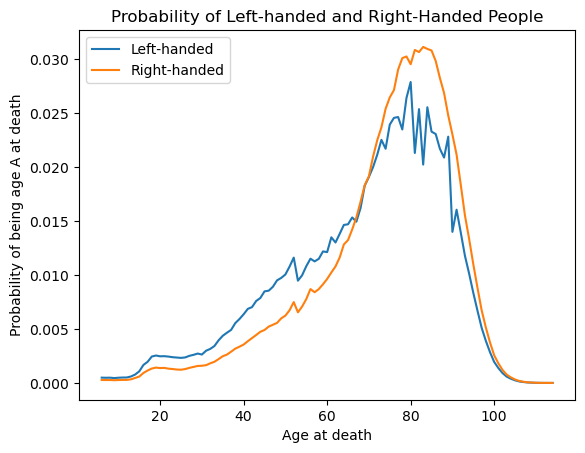

In [9]:
ages = np.arange(6, 115, 1) # make a list of ages of death to plot

# calculate the probability of being left- or right-handed for each 
left_handed_probability = P_A_given_lh(ages, death_distribution_data)
right_handed_probability = P_A_given_rh(ages, death_distribution_data)

# create a plot of the two probabilities vs. age
fig, ax = plt.subplots() # create figure and axis objects
ax.plot(ages, left_handed_probability, label = "Left-handed")
ax.plot(ages, right_handed_probability, label = 'Right-handed')
ax.legend() # add a legend
ax.set_xlabel("Age at death")
ax.set_ylabel(r"Probability of being age A at death")
ax.set_title("Probability of Left-handed and Right-Handed People")

The code provided calculates the probabilities of being left-handed or right-handed for each age of death in the range from 6 to 114. It then creates a plot showing the probabilities for both left-handed and right-handed individuals.

Here's a breakdown of the code:

The numpy arange function is used to create an array ages that contains the ages of death from 6 to 114 (inclusive) with a step size of 1.

The probabilities of being left-handed (left_handed_probability) and right-handed (right_handed_probability) are calculated by calling the P_A_given_lh and P_A_given_rh functions, respectively, using the ages array and the death_distribution_data DataFrame.

A plot is created using the plot function. Two lines are drawn on the plot: one for the left-handed probabilities (left_handed_probability) and one for the right-handed probabilities (right_handed_probability).

The label parameter is used to provide labels for the two lines in the legend.

The legend function is called to add a legend to the plot.

The x-axis label is set to "Age at death" using set_xlabel, and the y-axis label is set to "Probability of being age A at death" using set_ylabel.

By running this code, you will generate a plot that shows the probabilities of being a specific age at death for both left-handed and right-handed individuals based on the provided death distribution data.

## 9. Moment of truth: age of left and right-handers at death
<p>Finally, let's compare our results with the original study that found that left-handed people were nine years younger at death on average. We can do this by calculating the mean of these probability distributions in the same way we calculated P(LH) earlier, weighting the probability distribution by age and summing over the result.</p>
<p>$$\text{Average age of left-handed people at death} = \sum_A A P(A | LH)$$</p>
<p>$$\text{Average age of right-handed people at death} = \sum_A A P(A | RH)$$</p>

In [10]:
# calculate average ages for left-handed and right-handed groups
# use np.array so that two arrays can be multiplied
average_lh_age =  np.nansum(ages*np.array(left_handed_probability))
average_rh_age =  np.nansum(ages*np.array(right_handed_probability))

# print the average ages for each group
# ... YOUR CODE FOR TASK 9 ...
print("Average age of lefthanded =" , str(average_lh_age))
print("Average age of righthanded =" , str(average_rh_age))

# print the difference between the average ages
print("The difference in average ages is " + str(round(average_rh_age - average_lh_age, 1)) + " years.")



Average age of lefthanded = 67.24503662801027
Average age of righthanded = 72.79171936526477
The difference in average ages is 5.5 years.


The code provided calculates the average ages for the left-handed and right-handed groups based on the probabilities of being a specific age at death for each group. It then prints the average ages and the difference between them.

Here's a breakdown of the code:

The numpy function np.nansum is used to calculate the sum of the products of ages (ages) and probabilities (left_handed_probability or right_handed_probability). The np.array function is used to convert the probabilities into a numpy array so that the two arrays can be multiplied element-wise.

The average age for the left-handed group is calculated by multiplying the ages array with the left-handed probabilities array and summing the results.

The average age for the right-handed group is calculated similarly by multiplying the ages array with the right-handed probabilities array and summing the results.

The average ages for the left-handed and right-handed groups are printed using the print function.

The difference between the average ages is calculated by subtracting the average age of the left-handed group from the average age of the right-handed group. The result is rounded to one decimal place.

The difference in average ages is printed using the print function.

By running this code, you will obtain the average ages for the left-handed and right-handed groups based on the provided probabilities. Additionally, you will see the difference in average ages between the two groups.

## 10. Final comments
<p>We got a pretty big age gap between left-handed and right-handed people purely as a result of the changing rates of left-handedness in the population, which is good news for left-handers: you probably won't die young because of your sinisterness. The reported rates of left-handedness have increased from just 3% in the early 1900s to about 11% today, which means that older people are much more likely to be reported as right-handed than left-handed, and so looking at a sample of recently deceased people will have more old right-handers.</p>
<p>Our number is still less than the 9-year gap measured in the study. It's possible that some of the approximations we made are the cause: </p>
<ol>
<li>We used death distribution data from almost ten years after the study (1999 instead of 1991), and we used death data from the entire United States instead of California alone (which was the original study). </li>
<li>We extrapolated the left-handedness survey results to older and younger age groups, but it's possible our extrapolation wasn't close enough to the true rates for those ages. </li>
</ol>
<p>One thing we could do next is figure out how much variability we would expect to encounter in the age difference purely because of random sampling: if you take a smaller sample of recently deceased people and assign handedness with the probabilities of the survey, what does that distribution look like? How often would we encounter an age gap of nine years using the same data and assumptions? We won't do that here, but it's possible with this data and the tools of random sampling. </p>
<!-- I did do this if we want to add more tasks - it would probably take three more blocks.-->
<p>To finish off, let's calculate the age gap we'd expect if we did the study in 2018 instead of in 1990. The gap turns out to be much smaller since rates of left-handedness haven't increased for people born after about 1960. Both the National Geographic study and the 1990 study happened at a unique time - the rates of left-handedness had been changing across the lifetimes of most people alive, and the difference in handedness between old and young was at its most striking. </p>

In [12]:
# Calculate the probability of being left- or right-handed for all ages
left_handed_probability_2018 = P_A_given_lh(ages, death_distribution_data, 2018)
right_handed_probability_2018 = P_A_given_rh(ages, death_distribution_data, 2018)

# calculate average ages for left-handed and right-handed groups
average_lh_age_2018 = np.nansum(ages*np.array(left_handed_probability_2018))
average_rh_age_2018 = np.nansum(ages*np.array(right_handed_probability_2018))
print("The Avereage age of left-handed people is:", str(average_lh_age_2018))
print("The Avereage age of right-handed people is:", str(average_rh_age_2018))
print("The difference in average ages is " + 
      str(round(average_rh_age_2018 - average_lh_age_2018, 1)) + " years.")

The Avereage age of left-handed people is: 70.28773299940532
The Avereage age of right-handed people is: 72.62899693809848
The difference in average ages is 2.3 years.


The updated code calculates the probabilities of being left-handed or right-handed for all ages based on the provided death distribution data for the year 2018. It then calculates the average ages for the left-handed and right-handed groups using these probabilities. Finally, it prints the difference in average ages between the two groups for the year 2018.

Here's a breakdown of the code:

The probabilities of being left-handed (left_handed_probability_2018) and right-handed (right_handed_probability_2018) are calculated by calling the P_A_given_lh and P_A_given_rh functions, respectively, using the ages array, the death_distribution_data DataFrame, and the study year 2018.

The average ages for the left-handed and right-handed groups in 2018 are calculated by multiplying the ages array with the corresponding probabilities array and summing the results using np.nansum.

The difference in average ages between the right-handed and left-handed groups in 2018 is calculated by subtracting the average age of the left-handed group from the average age of the right-handed group. The result is rounded to one decimal place.

The difference in average ages is printed using the print function.

By running this updated code, you will obtain the difference in average ages between the left-handed and right-handed groups for the year 2018 based on the provided death distribution data.